In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

df = pd.read_csv('nypd-motor-vehicle-collisions.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,UNIQUE KEY
count,1.149752e+06,1.149752e+06,1.386001e+06,1.386001e+06,1.386002e+06,1.386002e+06,1.386002e+06,1.386002e+06,1.386002e+06,1.386002e+06,1.386002e+06
mean,4.071148e+01,-7.391025e+01,2.582256e-01,1.171716e-03,5.109228e-02,6.363627e-04,2.067097e-02,7.936496e-05,1.878828e-01,4.552663e-04,2.558943e+06
std,7.066884e-01,1.721175e+00,6.566651e-01,3.629780e-02,2.353682e-01,2.589576e-02,1.447039e-01,8.988978e-03,6.193406e-01,2.327315e-02,1.512101e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066874e+01,-7.397815e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.487472e+05
50%,4.072293e+01,-7.393107e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.329122e+06
75%,4.076739e+01,-7.386775e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.675750e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.022444e+06


In [3]:
cols_to_drop = ['DATE', "ZIP CODE", "LATITUDE", "LONGITUDE", "LOCATION", "ON STREET NAME", "CROSS STREET NAME", "OFF STREET NAME", "CONTRIBUTING FACTOR VEHICLE 1", "CONTRIBUTING FACTOR VEHICLE 2", "CONTRIBUTING FACTOR VEHICLE 3", "CONTRIBUTING FACTOR VEHICLE 4", "CONTRIBUTING FACTOR VEHICLE 5", "UNIQUE KEY", "VEHICLE TYPE CODE 1", "VEHICLE TYPE CODE 2", "VEHICLE TYPE CODE 3", "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 5"]
df = df.drop(columns=cols_to_drop,axis=1)

In [4]:
df = df.dropna()
df

,TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,0:10,MANHATTAN,0.0,0.0,0,0,0,0,0,0
2,0:45,BROOKLYN,4.0,0.0,0,0,0,0,4,0
3,1:00,BRONX,0.0,0.0,0,0,0,0,0,0
4,1:00,BROOKLYN,0.0,0.0,0,0,0,0,0,0
7,2:50,BRONX,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1385996,9:40,QUEENS,0.0,0.0,0,0,0,0,0,0
1385998,9:50,MANHATTAN,0.0,0.0,0,0,0,0,0,0
1385999,9:50,QUEENS,0.0,0.0,0,0,0,0,0,0
1386000,9:57,MANHATTAN,0.0,0.0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976502 entries, 0 to 1386001
Data columns (total 10 columns):
TIME                             976502 non-null object
BOROUGH                          976502 non-null object
NUMBER OF PERSONS INJURED        976502 non-null float64
NUMBER OF PERSONS KILLED         976502 non-null float64
NUMBER OF PEDESTRIANS INJURED    976502 non-null int64
NUMBER OF PEDESTRIANS KILLED     976502 non-null int64
NUMBER OF CYCLIST INJURED        976502 non-null int64
NUMBER OF CYCLIST KILLED         976502 non-null int64
NUMBER OF MOTORIST INJURED       976502 non-null int64
NUMBER OF MOTORIST KILLED        976502 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 82.0+ MB


In [6]:
df['TIME'] = df.TIME.str.replace(':', '')
df['TIME'] = df['TIME'].astype(float)

df = df.sample(frac = 1, replace=True, random_state = 1)

In [7]:
df = pd.get_dummies(df)
df = df.drop(columns = 'BOROUGH_STATEN ISLAND', axis = 1)

In [8]:
df

,TIME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS
198816,1740.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0
748998,900.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0
721362,1725.0,6.0,0.0,0,0,0,0,6,0,0,1,0,0
1145846,2047.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0
748351,800.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302203,1010.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0
954786,1930.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0
461026,1111.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0
795961,830.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0


In [9]:
cm = df.corr()['NUMBER OF PERSONS KILLED']
cm

TIME                            -0.002636
NUMBER OF PERSONS INJURED        0.027926
NUMBER OF PERSONS KILLED         1.000000
NUMBER OF PEDESTRIANS INJURED    0.022606
NUMBER OF PEDESTRIANS KILLED     0.781875
NUMBER OF CYCLIST INJURED       -0.001426
NUMBER OF CYCLIST KILLED         0.331653
NUMBER OF MOTORIST INJURED       0.022213
NUMBER OF MOTORIST KILLED        0.576513
BOROUGH_BRONX                    0.000277
BOROUGH_BROOKLYN                 0.000763
BOROUGH_MANHATTAN               -0.004645
BOROUGH_QUEENS                   0.002905
Name: NUMBER OF PERSONS KILLED, dtype: float64

In [10]:
label = df['NUMBER OF PERSONS KILLED']
feat = df.drop(columns = ['NUMBER OF PERSONS KILLED'], axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(feat, label, random_state = 0)

In [12]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

In [13]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [14]:
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy: 1.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


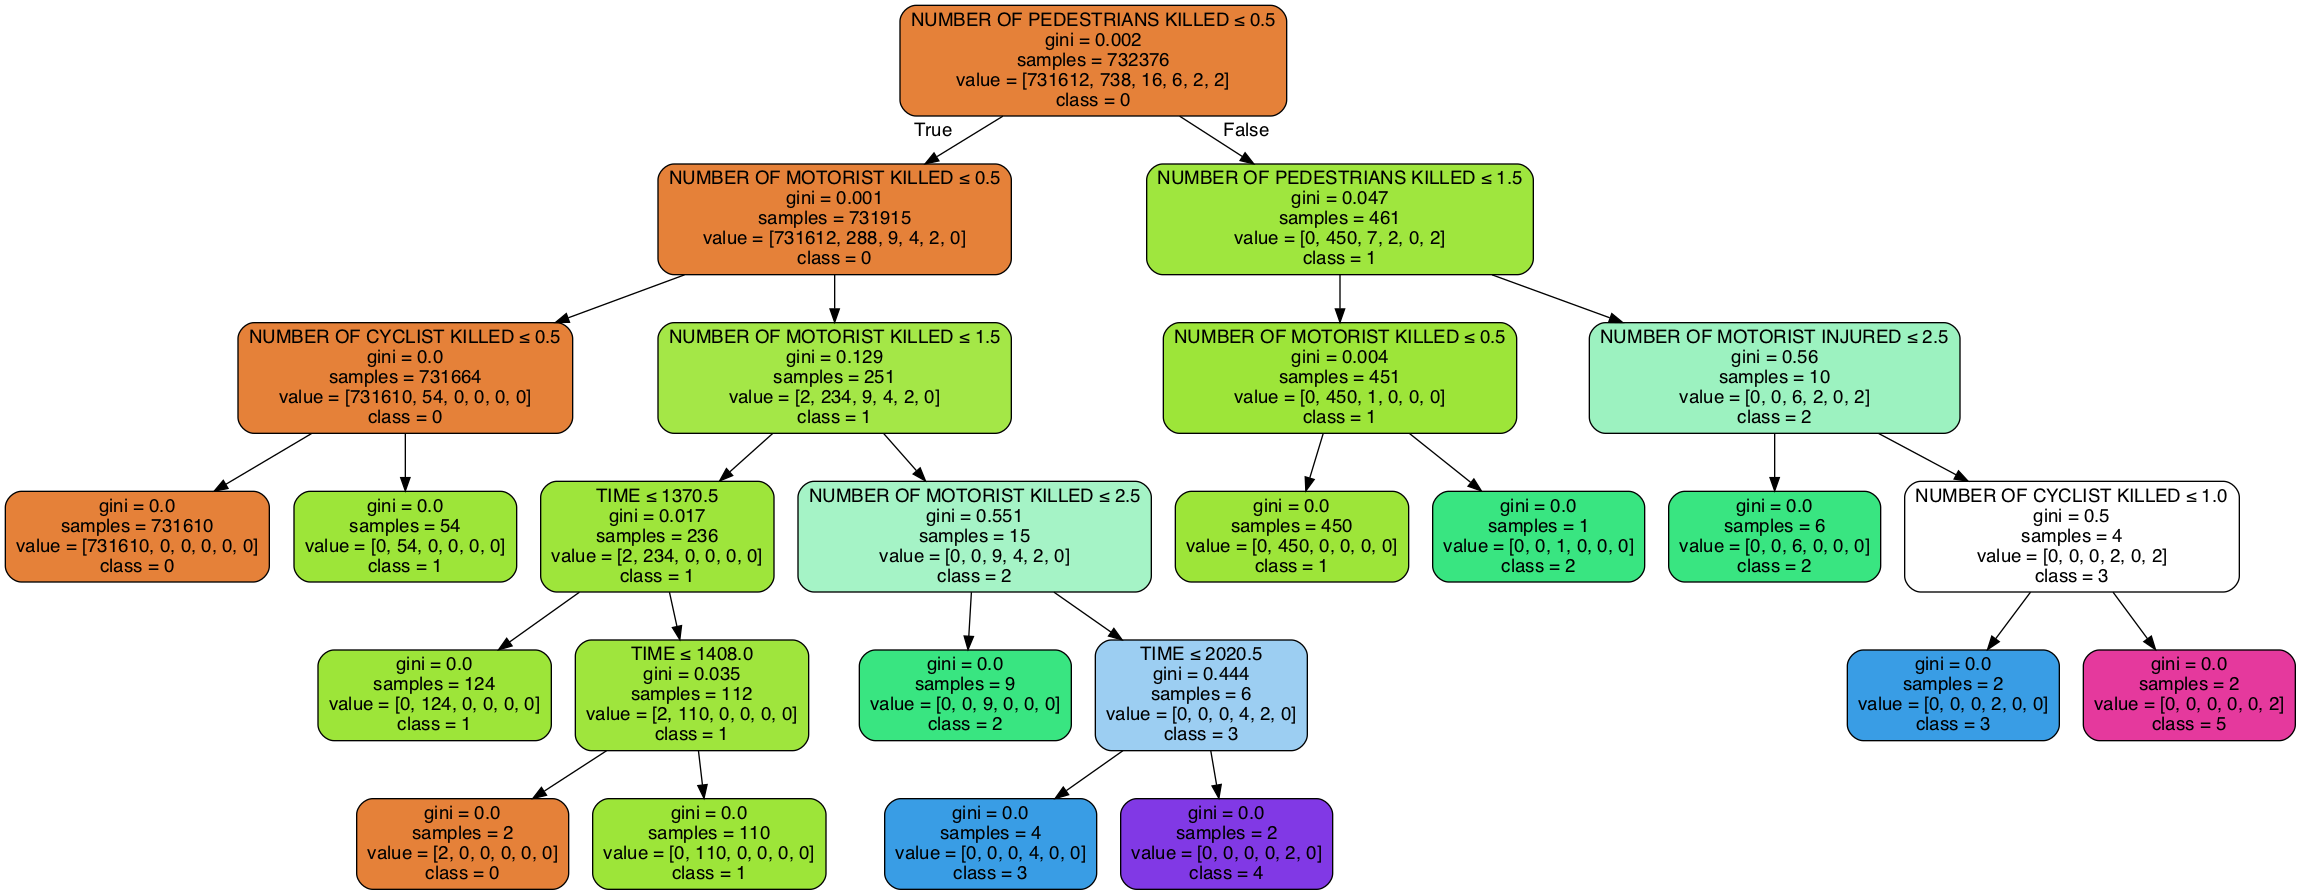

In [15]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

feature_cols = ['TIME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'BOROUGH_BRONX', 'BOROUGH_BROOKLYN', 'BOROUGH_MANHATTAN', 'BOROUGH_QUEENS']

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1', '2', '3', '4', '5', '6', '7', '8'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())